## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix 


## **Mounting Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Adding Dataset**

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv"
data=pd.read_csv(path)

## **Exploratory Data Analysis**

Fraudulent transactions: 0.17%

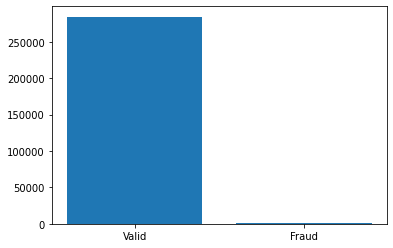

In [ ]:
plt.bar(['Valid','Fraud'],list(data['Class'].value_counts()))
print("Fraudulent transactions: ", end='')
frauds= data['Class'].value_counts()[1]/sum(data['Class'].value_counts())
print(round(frauds*100,2), end='%')
plt.show()

## **Correlation**

In [ ]:
# fig=plt.figure(figsize= (12, 12)) 
# sns.heatmap(data.corr(), cmap='Blues')
# plt.show()

## **Data Spliting (Test and Train)**

In [ ]:
x =data.iloc[:,:-1].values
y =data.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # 80% train 20% test

## **Model RandomForestClassifier**

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## **Prediction**

In [ ]:
y_pred = classifier.predict(x_test)

## **Accuracy Precision Recall**

In [ ]:
print("Model Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("Model Precision:", round(precision_score(y_test, y_pred),4))
print("Model Recall:", round(recall_score(y_test, y_pred),4))

Model Accuracy: 0.9995
Model Precision: 0.9167
Model Recall: 0.7624


## **Confusion Matrix**

In [ ]:
labels= ['Valid', 'Fraud'] 
cm=confusion_matrix(y_test, y_pred) 
cm

array([[56854,     7],
       [   24,    77]])

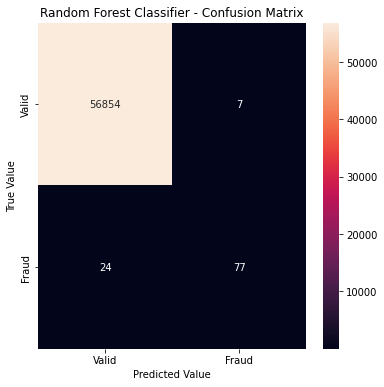

In [ ]:
plt.figure(figsize=(6, 6)) 
sns.heatmap(cm, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Random Forest Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()